# Get Immutable Reference Benchmarks

In [4]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-05-24 20-48-27 full.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [5]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [6]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
storage_read = convert_data(raw_data, "persistent_storage_read", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
storage_write = convert_data(raw_data, "persistent_storage_write", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

storage_read_long = storage_read.loc[storage_read["options.object_size"] == storage_read["options.object_size"].max()]
storage_write_long = storage_write.loc[storage_write["options.object_size"] == storage_write["options.object_size"].max()]

storage_read = storage_read.loc[storage_read["options.object_size"] < storage_read["options.object_size"].max()]
storage_write = storage_write.loc[storage_write["options.object_size"] < storage_write["options.object_size"].max()]

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())
display(HTML("<b>Long READ Data:</b>"))
display(storage_read_long)
display(HTML("<b>Long WRITE Data:</b>"))
display(storage_write_long)


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,282.638,163,726,0,esp32c3,0,500
1,1664.226,1468,1961,32,esp32c3,0,500
2,2997.312,2974,3674,64,esp32c3,0,500
3,4495.534,4061,4966,96,esp32c3,0,500
4,5994.978,5978,6002,128,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,397.272,243,696,0,esp32c3,0,500
1,1995.778,1904,1996,32,esp32c3,0,500
2,2995.966,2979,2996,64,esp32c3,0,500
3,4993.570,4296,4995,96,esp32c3,0,500
4,5994.940,5979,5995,128,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
31,383891.186,383868,384007,8192,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
31,383892.73,383868,384779,8192,esp32c3,0,500


Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

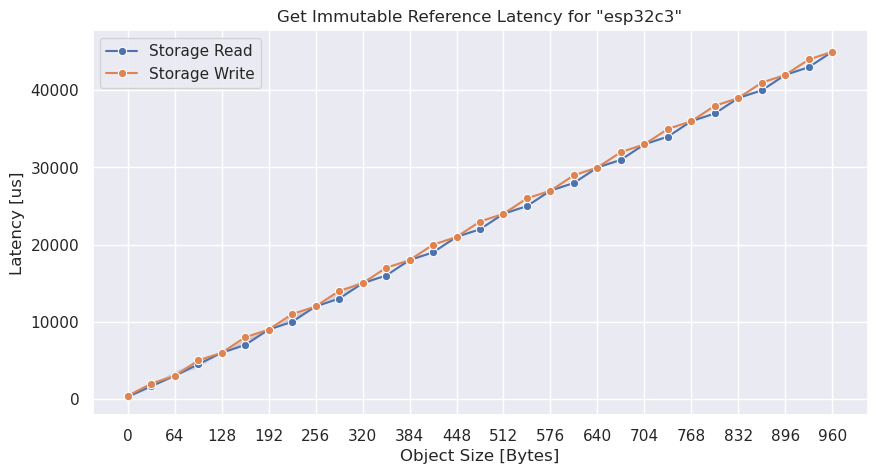

In [7]:
from util.plot import set_gird
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(storage_read) != 0:
    sns.lineplot(ax=ax, data=storage_read, x="options.object_size", y="mean", label="Storage Read", markers=["o"], marker="o")
    ax.fill_between(storage_read["options.object_size"], storage_read["min"], storage_read["max"], alpha=0.2, **fill_between_args)

if len(storage_write) != 0:
    sns.lineplot(ax=ax, data=storage_write, x="options.object_size", y="mean", label="Storage Write", markers=["o"], marker="o")
    ax.fill_between(storage_write["options.object_size"], storage_write["min"], storage_write["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(storage_read["options.object_size"].max(), storage_write["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + storage_write["machine_name"][0] + "\"")